In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_name = 'down_buffer2.csv'
df = pd.read_csv(file_name)
print(df.shape)
df.head()

(656, 10)


,0,1,2,3,4,5,6,7,8,9
0,266.0,261.0,265.0,261.0,268.0,278.0,284.0,295.0,299.0,310.0
1,261.0,265.0,261.0,268.0,278.0,284.0,295.0,299.0,310.0,312.0
2,265.0,261.0,268.0,278.0,284.0,295.0,299.0,310.0,312.0,319.0
3,261.0,268.0,278.0,284.0,295.0,299.0,310.0,312.0,319.0,329.0
4,268.0,278.0,284.0,295.0,299.0,310.0,312.0,319.0,329.0,332.0


In [3]:
df_diff = df.apply(lambda x: x - x[9], axis=1)
display(df_diff)

/tmp/ipykernel_4119/3226161005.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_diff = df.apply(lambda x: x - x[9], axis=1)


,0,1,2,3,4,5,6,7,8,9
0,-44.0,-49.0,-45.0,-49.0,-42.0,-32.0,-26.0,-15.0,-11.0,0.0
1,-51.0,-47.0,-51.0,-44.0,-34.0,-28.0,-17.0,-13.0,-2.0,0.0
2,-54.0,-58.0,-51.0,-41.0,-35.0,-24.0,-20.0,-9.0,-7.0,0.0
3,-68.0,-61.0,-51.0,-45.0,-34.0,-30.0,-19.0,-17.0,-10.0,0.0
4,-64.0,-54.0,-48.0,-37.0,-33.0,-22.0,-20.0,-13.0,-3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
651,13.0,12.0,12.0,9.0,5.0,2.0,1.0,-3.0,-3.0,0.0
652,17.0,17.0,14.0,10.0,7.0,6.0,2.0,2.0,5.0,0.0
653,15.0,12.0,8.0,5.0,4.0,0.0,0.0,3.0,-2.0,0.0
654,10.0,6.0,3.0,2.0,-2.0,-2.0,1.0,-4.0,-2.0,0.0


<Axes: >

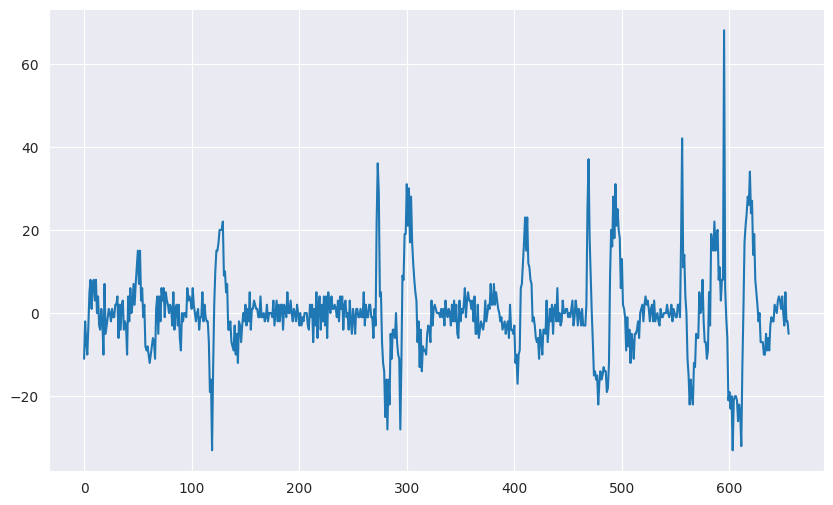

In [4]:
df_diff['8'].plot(figsize=(10, 6))

<Axes: >

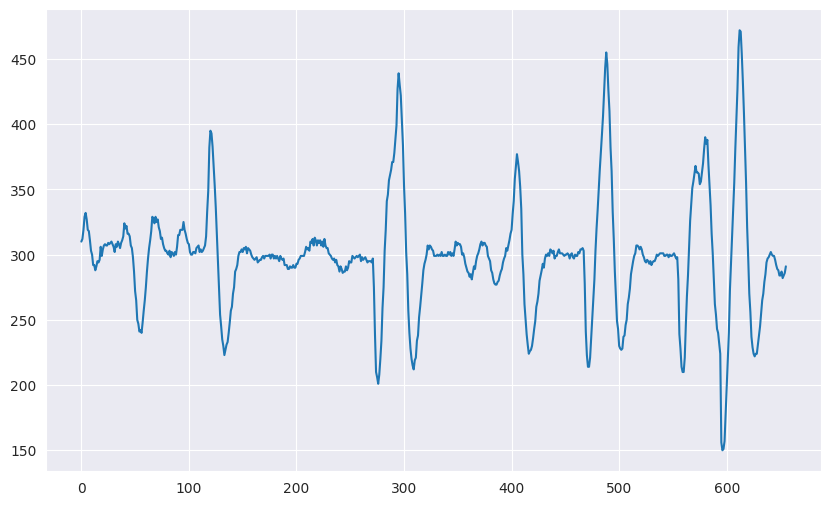

In [5]:
df['9'].plot(figsize=(10, 6))

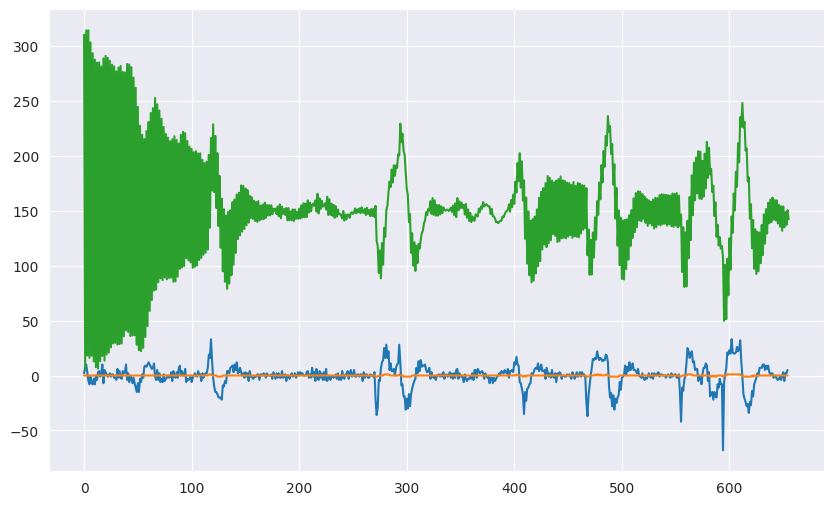

In [16]:
res = df['9'].dropna().values
new_res = np.zeros_like(res)
new_res2 = np.zeros_like(res)
new_res[0] = res[0]
for i in range(1, len(res)):
    new_res[i] = res[i] - 0.99 * new_res[i-1]
    # ew_res2[i] = res[i] - new_res[i]
    
new_res2 = res[1:] - res[:-1]
    
plt.figure(figsize=(10, 6))
# plt.plot(res)
# plt.plot(new_res)
plt.plot(new_res2)

threshold = 15
new_res3 = np.zeros_like(new_res2)
for i in range(1, len(new_res2)):
    new_res3[i] = 1 if new_res2[i] > threshold else -1 if new_res2[i] < -threshold else 0
plt.plot(new_res3)
plt.plot(new_res)

In [7]:
df_diff.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,0,1,2,3,4,5,6,7,8,9
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.0
mean,-0.310976,-0.294207,-0.259146,-0.182927,-0.143293,-0.048780,-0.018293,-0.004573,-0.006098,0.0
std,63.512150,59.036646,53.889538,48.108466,41.622596,34.504971,26.791185,18.506899,9.922753,0.0
min,-219.000000,-187.000000,-165.000000,-145.000000,-125.000000,-104.000000,-78.000000,-56.000000,-33.000000,0.0
10%,-64.000000,-60.500000,-55.000000,-49.000000,-42.000000,-34.500000,-27.000000,-18.000000,-10.000000,0.0
25%,-21.250000,-21.250000,-19.000000,-17.000000,-15.000000,-12.000000,-9.000000,-7.000000,-4.000000,0.0
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.0
75%,13.000000,12.000000,10.000000,9.000000,8.000000,7.000000,5.000000,4.000000,3.000000,0.0
90%,77.000000,77.500000,73.500000,73.000000,59.000000,44.000000,33.000000,19.500000,10.000000,0.0
max,217.000000,201.000000,184.000000,163.000000,139.000000,112.000000,88.000000,76.000000,68.000000,0.0


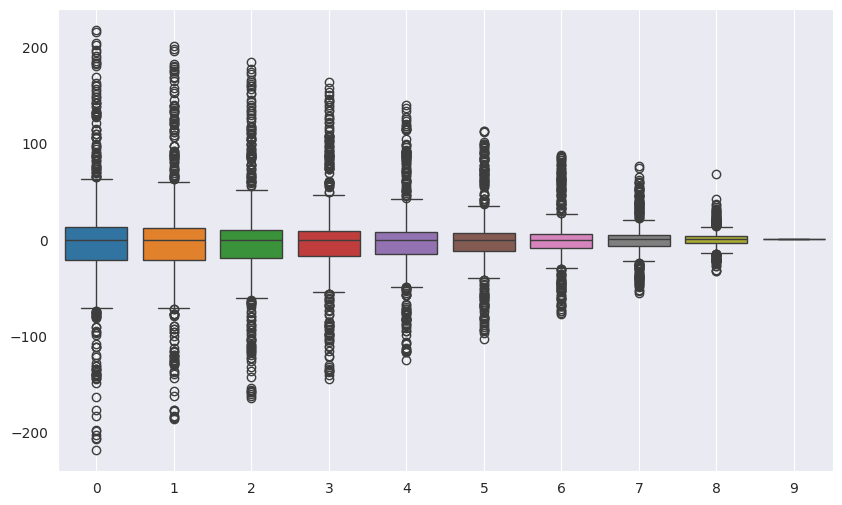

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

# Plot the distribution of each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_diff, showfliers=True)
plt.grid()

In [9]:
display(df_diff.sort_values(by='8', ascending=False))

,0,1,2,3,4,5,6,7,8,9
595,160.0,145.0,126.0,106.0,98.0,87.0,84.0,76.0,68.0,0.0
556,61.0,60.0,60.0,61.0,62.0,60.0,58.0,59.0,42.0,0.0
469,58.0,58.0,61.0,60.0,63.0,61.0,64.0,62.0,37.0,0.0
273,59.0,57.0,55.0,56.0,50.0,56.0,55.0,58.0,36.0,0.0
619,106.0,138.0,151.0,150.0,133.0,112.0,88.0,60.0,34.0,0.0
...,...,...,...,...,...,...,...,...,...,...
282,-64.0,-93.0,-97.0,-102.0,-95.0,-83.0,-69.0,-44.0,-28.0,0.0
294,-81.0,-70.0,-66.0,-62.0,-56.0,-56.0,-49.0,-39.0,-28.0,0.0
611,-219.0,-186.0,-165.0,-145.0,-125.0,-104.0,-78.0,-56.0,-32.0,0.0
119,-80.0,-78.0,-80.0,-79.0,-77.0,-75.0,-68.0,-49.0,-33.0,0.0
